# RAMP Project: Predicting Cyclist Traffic in Paris

In [ ]:
# 1. EDA

## 1.1 Load data

In [1]:
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_parquet(Path('data') / 'train.parquet')
test = pd.read_parquet(Path('data') / 'test.parquet')

In [3]:
test.head()

,counter_id,counter_name,site_id,site_name,bike_count,date,counter_installation_date,coordinates,counter_technical_id,latitude,longitude,log_bike_count
56474,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,1.0,2021-08-10 05:00:00,2013-01-18,"48.846028,2.375429",Y2H15027244,48.846028,2.375429,0.693147
56477,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,2.0,2021-08-10 06:00:00,2013-01-18,"48.846028,2.375429",Y2H15027244,48.846028,2.375429,1.098612
56480,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,1.0,2021-08-10 07:00:00,2013-01-18,"48.846028,2.375429",Y2H15027244,48.846028,2.375429,0.693147
56483,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,0.0,2021-08-10 09:00:00,2013-01-18,"48.846028,2.375429",Y2H15027244,48.846028,2.375429,0.000000
56486,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,1.0,2021-08-10 10:00:00,2013-01-18,"48.846028,2.375429",Y2H15027244,48.846028,2.375429,0.693147


In [4]:
data.head()

,counter_id,counter_name,site_id,site_name,bike_count,date,counter_installation_date,coordinates,counter_technical_id,latitude,longitude,log_bike_count
48321,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,0.0,2020-09-01 02:00:00,2013-01-18,"48.846028,2.375429",Y2H15027244,48.846028,2.375429,0.000000
48324,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,1.0,2020-09-01 03:00:00,2013-01-18,"48.846028,2.375429",Y2H15027244,48.846028,2.375429,0.693147
48327,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,0.0,2020-09-01 04:00:00,2013-01-18,"48.846028,2.375429",Y2H15027244,48.846028,2.375429,0.000000
48330,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,4.0,2020-09-01 15:00:00,2013-01-18,"48.846028,2.375429",Y2H15027244,48.846028,2.375429,1.609438
48333,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,9.0,2020-09-01 18:00:00,2013-01-18,"48.846028,2.375429",Y2H15027244,48.846028,2.375429,2.302585


In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41608 entries, 56474 to 929187
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   counter_id                 41608 non-null  category      
 1   counter_name               41608 non-null  category      
 2   site_id                    41608 non-null  int64         
 3   site_name                  41608 non-null  category      
 4   bike_count                 41608 non-null  float64       
 5   date                       41608 non-null  datetime64[ns]
 6   counter_installation_date  41608 non-null  datetime64[ns]
 7   coordinates                41608 non-null  category      
 8   counter_technical_id       41608 non-null  category      
 9   latitude                   41608 non-null  float64       
 10  longitude                  41608 non-null  float64       
 11  log_bike_count             41608 non-null  float64       
dtyp

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 455163 entries, 48321 to 928462
Data columns (total 12 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   counter_id                 455163 non-null  category      
 1   counter_name               455163 non-null  category      
 2   site_id                    455163 non-null  int64         
 3   site_name                  455163 non-null  category      
 4   bike_count                 455163 non-null  float64       
 5   date                       455163 non-null  datetime64[ns]
 6   counter_installation_date  455163 non-null  datetime64[ns]
 7   coordinates                455163 non-null  category      
 8   counter_technical_id       455163 non-null  category      
 9   latitude                   455163 non-null  float64       
 10  longitude                  455163 non-null  float64       
 11  log_bike_count             455163 non-null  floa

In [7]:
data.nunique(axis=0)

counter_id                     56
counter_name                   56
site_id                        30
site_name                      30
bike_count                    977
date                         8230
counter_installation_date      22
coordinates                    30
counter_technical_id           30
latitude                       30
longitude                      30
log_bike_count                977
dtype: int64

In [8]:
data.groupby(['site_name', 'counter_name'])['bike_count'].sum().sort_values(ascending=False).head(10).to_frame()

,,bike_count
site_name,counter_name,
Totem 73 boulevard de Sébastopol,Totem 73 boulevard de Sébastopol S-N,1809231.0
Totem 64 Rue de Rivoli,Totem 64 Rue de Rivoli O-E,1406900.0
Totem 73 boulevard de Sébastopol,Totem 73 boulevard de Sébastopol N-S,1357868.0
67 boulevard Voltaire SE-NO,67 boulevard Voltaire SE-NO,1036575.0
Totem 64 Rue de Rivoli,Totem 64 Rue de Rivoli E-O,914089.0
27 quai de la Tournelle,27 quai de la Tournelle SE-NO,888717.0
Quai d'Orsay,Quai d'Orsay E-O,849724.0
Totem Cours la Reine,Totem Cours la Reine O-E,806149.0
Face au 48 quai de la marne,Face au 48 quai de la marne SO-NE,806071.0


<AxesSubplot:xlabel='date'>

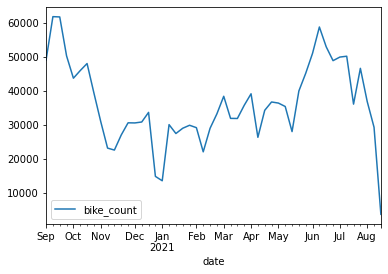

In [9]:
mask = data['counter_name'] == 'Totem 73 boulevard de Sébastopol S-N'

data[mask].groupby(pd.Grouper(freq='1w', key='date'))[['bike_count']].sum().plot()

<AxesSubplot:xlabel='date'>

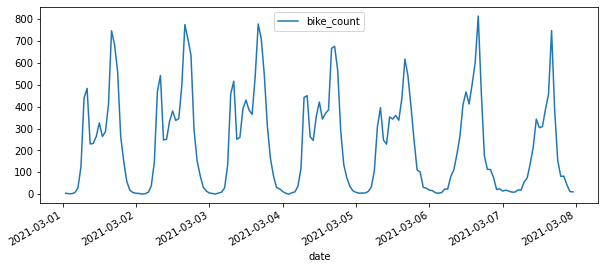

In [10]:
fig, ax = plt.subplots(figsize=(10, 4))

mask = ((data['counter_name'] == 'Totem 73 boulevard de Sébastopol S-N')
        & (data['date'] > pd.to_datetime('2021/03/01'))
        & (data['date'] < pd.to_datetime('2021/03/08')))

data[mask].plot(x='date', y='bike_count', ax=ax)

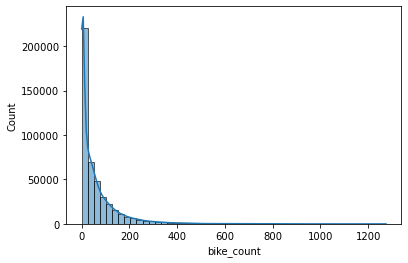

In [11]:
import seaborn as sns

ax = sns.histplot(data, x='bike_count', kde=True, bins=50)

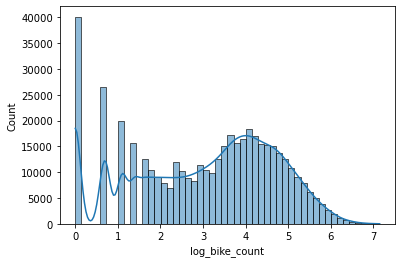

In [12]:
ax = sns.histplot(data, x='log_bike_count', kde=True, bins=50)

## 1.2. Feature engineering: encode dates with sine-cosine transformation

In [13]:
def _encode_dates(X):
    X = X.copy()  # modify a copy of X
    # Encode the date information from the DateOfDeparture columns
    X.loc[:, "year"] = X["date"].dt.year
    X.loc[:, "month"] = X["date"].dt.month
    X.loc[:, "month_sin"] = np.sin(X["date"].dt.month * 2 * np.pi / 12)
    X.loc[:, "month_cos"] = np.cos(X["date"].dt.month * 2 * np.pi / 12)
    X.loc[:, "day"] = X["date"].dt.day
    X.loc[:, "weekday"] = X["date"].dt.weekday
    X.loc[:, "weekday_sin"] = np.sin(X["date"].dt.weekday * 2 * np.pi / 7)
    X.loc[:, "weekday_cos"] = np.cos(X["date"].dt.weekday * 2 * np.pi / 7)
    X.loc[:, "hour"] = X["date"].dt.hour
    X.loc[:, "hour_sin"] = np.sin(X["date"].dt.hour * 2 * np.pi / 24)
    X.loc[:, "hour_cos"] = np.cos(X["date"].dt.hour * 2 * np.pi / 24)

    # Finally we can drop the original columns from the dataframe
    return X.drop(columns=["date"]) 

In [14]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(sparse=False)
enc.fit_transform(_encode_dates(data[['date']])[['hour']].head())

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

## 1.3. Add external data

In [77]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import Ridge
from sklearn.ensemble import HistGradientBoostingRegressor
import requests
import re
import pytrends
from pytrends.request import TrendReq
from pytrends import dailydata
from datetime import time
import datetime

In [78]:
df = pd.DataFrame({'date': pd.date_range('2020-09-01', '2021-10-21', freq='1H', closed='left')})
df_FINAL = pd.read_csv("external_data.csv", parse_dates=['date'])
df_FINAL = df_FINAL.drop(columns=["numer_sta","tx24", "tn24", "tminsol", "sw", "tw", "niv_bar", "geop", "phenspe1", "phenspe2", "phenspe3", "phenspe4", "nnuage4","ctype4", "hnuage4"])
df = pd.merge(df, df_FINAL, on="date", how="left")

for i in df:
    if i not in ['n', 'rr1']:
        df[i] = df[i].ffill()

In [79]:
df.head()

,date,pmer,tend,cod_tend,dd,ff,t,td,u,vv,...,rr24,nnuage1,ctype1,hnuage1,nnuage2,ctype2,hnuage2,nnuage3,ctype3,hnuage3
0,2020-09-01 00:00:00,102050.0,-10.0,8.0,340.0,1.6,285.75,282.55,81.0,30000.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-09-01 01:00:00,102050.0,-10.0,8.0,340.0,1.6,285.75,282.55,81.0,30000.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-09-01 02:00:00,102050.0,-10.0,8.0,340.0,1.6,285.75,282.55,81.0,30000.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-09-01 03:00:00,101990.0,-60.0,6.0,290.0,1.1,283.95,282.05,88.0,25000.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-09-01 04:00:00,101990.0,-60.0,6.0,290.0,1.1,283.95,282.05,88.0,25000.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


LOCKDOWN

In [80]:
df["lockdown"] = [1 
                        if (i.date() >= pd.Timestamp(year=2020, month=3, day=12) and 
                            i.date() <= pd.Timestamp(year=2020, month=5, day=10)) or 
                            (i.date() >= pd.Timestamp(year=2020, month=10, day=14) and 
                             i.date() <= pd.Timestamp(year=2020, month=12, day=10)) or 
                            (i.date() >= pd.Timestamp(year=2021, month=3, day=31) and 
                             i.date() <= pd.Timestamp(year=2021, month=5, day=2))
                        else 0 
                        for i in df["date"]
                       ]

CURFEW

In [81]:
df["curfew"] = [1 
                      if (i.date() >= pd.Timestamp(year=2021, month=5, day=3) and 
                          i.date() <= pd.Timestamp(year=2021, month=5, day=18) and
                          (i.time() >= time(19) or i.time() <= time(6))) or
                          (i.date() >= pd.Timestamp(year=2021, month=5, day=19) and 
                           i.date() <= pd.Timestamp(year=2021, month=6, day=8) and
                           (i.time() >= time(21) or i.time() <= time(6))) or
                          (i.date() >= pd.Timestamp(year=2021, month=6, day=9) and 
                           i.date() <= pd.Timestamp(year=2021, month=6, day=29) and
                           (i.time() >= time(23) or i.time() <= time(6)))
                      else 0 
                      for i in df["date"]
                     ]

METRO TRAFFIC

In [83]:
df_metro = pd.read_csv("frequentation_metro_defense.csv", sep=";", parse_dates=['date'])
df_metro.head()

,date,type_jour,total
0,2021-01-05,JOHV,115353
1,2021-01-08,JOHV,116364
2,2021-01-10,DIJFP,58457
3,2021-01-13,JOHV,130363
4,2021-01-18,JOHV,110719


In [84]:
df["freq_metro"] = ""
for i in df["date"]:
    for j in df_metro["date"]:
        if i == j:
            ind_true = df[df['date'] == i].index.values
            ind_metro = df_metro[df_metro['date'] == i].index.values
            for k in range(24):
                df.at[ind_true[0] + k, 'freq_metro'] = df_metro.at[ind_metro[0], 'total']

GOOGLE TRENDS

In [85]:
searches = ["velo electrique", "velib", "velib paris", "borne velib", "velo electrique prime",
            "velo electrique subvention", "velo tout chemin", "piste cyclable", "velo decathlon", 
            "achat de velo","greve transport", "station velib", "greve metro"]

In [86]:
def search_gtrend_df(l):
    """use a list to search words on G trends
    and return a df with date, search and the trend score"""
    pytrend = TrendReq()
    dicti = { }
    for trending in l :
        pytrend.build_payload([trending], timeframe='2020-08-30 2021-10-21', geo="FR-J")
        dicti[trending] = pytrend.interest_over_time()
    df = pd.concat(dicti, axis=1)
    df.columns = df.columns.droplevel(0)
    df = df.drop('isPartial', axis=1)
    df = df.reset_index()
    df = pd.melt(df, id_vars='date', value_vars=l)
    return df

In [87]:
df_gtrends = search_gtrend_df(searches)

k = 1
dicti = { }
for i in df_gtrends['date']:
    if k < 60 :
        ind_true = df_gtrends[df_gtrends['date'] == i].index.values
        #print(i.date(),ind_true)
        for j in ind_true:
            if i in dicti: dicti[i] += df_gtrends.at[j, 'value']
            else: dicti[i] = df_gtrends.at[j, 'value']
    else: break
    k += 1
    
data_items = dicti.items()
data_list = list(data_items)
df_googlet = pd.DataFrame(data_list)
df_googlet = df_googlet.rename(columns={0: "date", 1: "frequency"})

In [88]:
df_googlet.head()

,date,frequency
0,2020-08-30,620
1,2020-09-06,640
2,2020-09-13,871
3,2020-09-20,504
4,2020-09-27,445


In [89]:
for i in df["date"]:
    for j in df_googlet["date"]:
        if i == j:
            ind_true = df[df['date'] == i].index.values
            ind_metro = df_googlet[df_googlet['date'] == i].index.values
            df.at[ind_true[0], 'gtrends'] = df_googlet.at[ind_metro[0], 'frequency']

In [90]:
df['gtrends'] = df['gtrends'].ffill(limit=167)

# BANK HOLIDAY

In [91]:
df["ferie"] = [1 
                     if (i.date() == pd.Timestamp(year=2020, month=11, day=1)) or
                         (i.date() == pd.Timestamp(year=2020, month=11, day=11)) or
                         (i.date() == pd.Timestamp(year=2020, month=12, day=25)) or
                         (i.date() == pd.Timestamp(year=2021, month=1, day=1)) or
                         (i.date() == pd.Timestamp(year=2021, month=4, day=5)) or
                         (i.date() == pd.Timestamp(year=2021, month=5, day=1)) or
                         (i.date() == pd.Timestamp(year=2021, month=5, day=8)) or
                         (i.date() == pd.Timestamp(year=2021, month=5, day=13)) or
                         (i.date() == pd.Timestamp(year=2021, month=5, day=24)) or
                         (i.date() == pd.Timestamp(year=2021, month=7, day=14)) or
                         (i.date() == pd.Timestamp(year=2021, month=8, day=15))
                     else 0 
                     for i in df["date"]
                    ]

HOLIDAY

In [92]:
df["vacances"] = [1 
                        if (i.date() >= pd.Timestamp(year=2020, month=10, day=17) and 
                            i.date() <= pd.Timestamp(year=2020, month=11, day=1)) or
                            (i.date() >= pd.Timestamp(year=2020, month=12, day=19) and 
                             i.date() <= pd.Timestamp(year=2021, month=1, day=3)) or
                            (i.date() >= pd.Timestamp(year=2021, month=2, day=13) and 
                             i.date() <= pd.Timestamp(year=2021, month=2, day=28)) or
                            (i.date() >= pd.Timestamp(year=2021, month=4, day=10) and 
                             i.date() <= pd.Timestamp(year=2021, month=4, day=25)) or
                            (i.date() >= pd.Timestamp(year=2021, month=5, day=12) and 
                             i.date() <= pd.Timestamp(year=2021, month=5, day=16)) or
                            (i.date() >= pd.Timestamp(year=2021, month=7, day=6) and 
                            i.date() <= pd.Timestamp(year=2021, month=9, day=6))
                        else 0 
                        for i in df["date"]
                       ]

RUSH HOUR

In [93]:
df["rush_hour"] = [1
                         if (i.time() >= time(7, 30) and i.time() <= time(9, 30)) or
                         (i.time() >= time(17) and i.time() <= time(19, 30))
                    else 0 
                    for i in df["date"]]

CAR TRAFFIC

In [94]:
df_cars = pd.read_csv("traffic_CE.csv", sep=";", parse_dates=['Date et heure de comptage'])
df_cars = df_cars.rename(columns={"Date et heure de comptage": "date", "Débit horaire": "debit_h", "Taux d'occupation" : "taux_occ"})
for _ in range(2):
    df_cars.drop(df_cars.columns[0], axis=1, inplace=True)
for _ in range(10):
    df_cars.drop(df_cars.columns[3], axis=1, inplace=True)
df_cars['date']=df_cars['date'].apply(lambda x: x.replace(tzinfo=None))

In [95]:
df = pd.merge(df, df_cars, on="date", how="left")

GOOGLE MOBILITY

In [96]:
df_mobility = pd.read_csv("Mobility_Report.csv", sep=",")
df_mobility.head()

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,FR,France,NaN,NaN,NaN,NaN,NaN,ChIJMVd4MymgVA0R99lHx5Y__Ws,2021-01-01,-83.0,-87.0,-7.0,-69.0,-87,24.0
1,FR,France,NaN,NaN,NaN,NaN,NaN,ChIJMVd4MymgVA0R99lHx5Y__Ws,2021-01-02,-47.0,-12.0,-27.0,-33.0,-32,10.0
2,FR,France,NaN,NaN,NaN,NaN,NaN,ChIJMVd4MymgVA0R99lHx5Y__Ws,2021-01-03,-50.0,-13.0,-32.0,-29.0,-19,6.0
3,FR,France,NaN,NaN,NaN,NaN,NaN,ChIJMVd4MymgVA0R99lHx5Y__Ws,2021-01-04,-37.0,-2.0,-24.0,-34.0,-27,11.0
4,FR,France,NaN,NaN,NaN,NaN,NaN,ChIJMVd4MymgVA0R99lHx5Y__Ws,2021-01-05,-36.0,2.0,-19.0,-33.0,-26,11.0


In [97]:
test2 = df_mobility[(df_mobility['sub_region_1'] == 'Île-de-France') & (df_mobility['sub_region_2'] == 'Paris')][['date','transit_stations_percent_change_from_baseline']] 
test2['date'] = pd.to_datetime(test2['date'])
test2.set_index(test2['date'])
test2.head()

,date,transit_stations_percent_change_from_baseline
19604,2021-01-01,-72.0
19605,2021-01-02,-40.0
19606,2021-01-03,-36.0
19607,2021-01-04,-41.0
19608,2021-01-05,-40.0


In [98]:
df = pd.merge(df, test2, on="date", how="left")
df["transit_stations_percent_change_from_baseline"] = df["transit_stations_percent_change_from_baseline"].ffill(limit=23)

EXPORT

In [99]:
df.head()

,date,pmer,tend,cod_tend,dd,ff,t,td,u,vv,...,lockdown,curfew,freq_metro,gtrends,ferie,vacances,rush_hour,debit_h,taux_occ,transit_stations_percent_change_from_baseline
0,2020-09-01 00:00:00,102050.0,-10.0,8.0,340.0,1.6,285.75,282.55,81.0,30000.0,...,0,0,,NaN,0,0,0,NaN,NaN,NaN
1,2020-09-01 01:00:00,102050.0,-10.0,8.0,340.0,1.6,285.75,282.55,81.0,30000.0,...,0,0,,NaN,0,0,0,NaN,NaN,NaN
2,2020-09-01 02:00:00,102050.0,-10.0,8.0,340.0,1.6,285.75,282.55,81.0,30000.0,...,0,0,,NaN,0,0,0,NaN,NaN,NaN
3,2020-09-01 03:00:00,101990.0,-60.0,6.0,290.0,1.1,283.95,282.05,88.0,25000.0,...,0,0,,NaN,0,0,0,NaN,NaN,NaN
4,2020-09-01 04:00:00,101990.0,-60.0,6.0,290.0,1.1,283.95,282.05,88.0,25000.0,...,0,0,,NaN,0,0,0,NaN,NaN,NaN


In [100]:
df.to_csv("external_data_NEW.csv", index=False)

In [101]:
__file__ = Path('submissions') /  'external_data' /  'estimator.py'


def _merge_external_data(X):
    file_path = Path(__file__).parent / 'external_data.csv'
    df_ext = pd.read_csv(file_path, parse_dates=['date'])
    
    X = X.copy()
    # When using merge_asof left frame need to be sorted
    X['orig_index'] = np.arange(X.shape[0])
    X = pd.merge_asof(X.sort_values('date'), df_ext[['date', 't', 'n','lockdown', 'freq_metro', 'curfew', 'ferie', 'vacances', 'rush_hour', 'debit_h', 'rr1', 'transit_stations_percent_change_from_baseline', 'gtrends']].sort_values('date'), on='date')
    # Sort back to the original order
    X = X.sort_values('orig_index')
    del X['orig_index']
    return X

In [102]:
import problem

X_train, y_train = problem.get_train_data()
X_test, y_test = problem.get_test_data()

In [103]:
X_train_merge = _merge_external_data(X_train)
X_train_merge.head()
X_test_merge = _merge_external_data(X_test)

In [104]:
for column in X_train_merge.columns:
    X_train_merge[column].fillna(X_train_merge[column].mode()[0], inplace=True)

for column in X_test_merge.columns:
    X_test_merge[column].fillna(X_test_merge[column].mode()[0], inplace=True)

In [105]:
X_train_merge.head()

,counter_id,counter_name,site_id,site_name,date,counter_installation_date,coordinates,counter_technical_id,latitude,longitude,...,lockdown,freq_metro,curfew,ferie,vacances,rush_hour,debit_h,rr1,transit_stations_percent_change_from_baseline,gtrends
0,100049407-353255860,152 boulevard du Montparnasse E-O,100049407,152 boulevard du Montparnasse,2020-09-01 01:00:00,2018-12-07,"48.840801,2.333233",Y2H19070373,48.840801,2.333233,...,0,16535.0,0,0,0,0,61.0,0.0,-42.0,248.0
30,100049407-353255859,152 boulevard du Montparnasse O-E,100049407,152 boulevard du Montparnasse,2020-09-01 01:00:00,2018-12-07,"48.840801,2.333233",Y2H19070373,48.840801,2.333233,...,0,16535.0,0,0,0,0,61.0,0.0,-42.0,248.0
31,100036719-104036719,18 quai de l'Hôtel de Ville NO-SE,100036719,18 quai de l'Hôtel de Ville,2020-09-01 01:00:00,2017-07-12,"48.85372,2.35702",Y2H19027732,48.853720,2.357020,...,0,16535.0,0,0,0,0,61.0,0.0,-42.0,248.0
32,100036719-103036719,18 quai de l'Hôtel de Ville SE-NO,100036719,18 quai de l'Hôtel de Ville,2020-09-01 01:00:00,2017-07-12,"48.85372,2.35702",Y2H19027732,48.853720,2.357020,...,0,16535.0,0,0,0,0,61.0,0.0,-42.0,248.0
33,100063175-353277233,20 Avenue de Clichy NO-SE,100063175,20 Avenue de Clichy,2020-09-01 01:00:00,2020-07-22,"48.88529,2.32666",Y2H20073268,48.885290,2.326660,...,0,16535.0,0,0,0,0,61.0,0.0,-42.0,248.0


## 1.4. Data Vizualization

In [106]:
X_train_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 455163 entries, 0 to 455162
Data columns (total 22 columns):
 #   Column                                         Non-Null Count   Dtype         
---  ------                                         --------------   -----         
 0   counter_id                                     455163 non-null  category      
 1   counter_name                                   455163 non-null  category      
 2   site_id                                        455163 non-null  int64         
 3   site_name                                      455163 non-null  category      
 4   date                                           455163 non-null  datetime64[ns]
 5   counter_installation_date                      455163 non-null  datetime64[ns]
 6   coordinates                                    455163 non-null  category      
 7   counter_technical_id                           455163 non-null  category      
 8   latitude                                    

In [107]:
X_train_merge.isnull().sum()

counter_id                                       0
counter_name                                     0
site_id                                          0
site_name                                        0
date                                             0
counter_installation_date                        0
coordinates                                      0
counter_technical_id                             0
latitude                                         0
longitude                                        0
t                                                0
n                                                0
lockdown                                         0
freq_metro                                       0
curfew                                           0
ferie                                            0
vacances                                         0
rush_hour                                        0
debit_h                                          0
rr1                            

<AxesSubplot:>

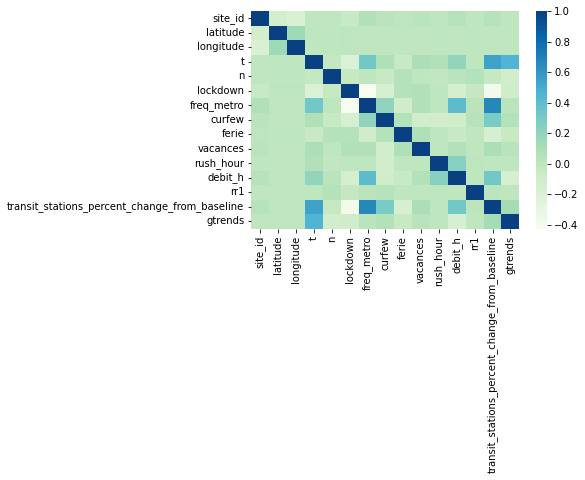

In [108]:
import seaborn as sns
import matplotlib.pyplot as plt
correlation = X_train_merge.corr()
sns.heatmap(correlation, cmap='GnBu')

CORRELATION AMONG ADDED FEATURES

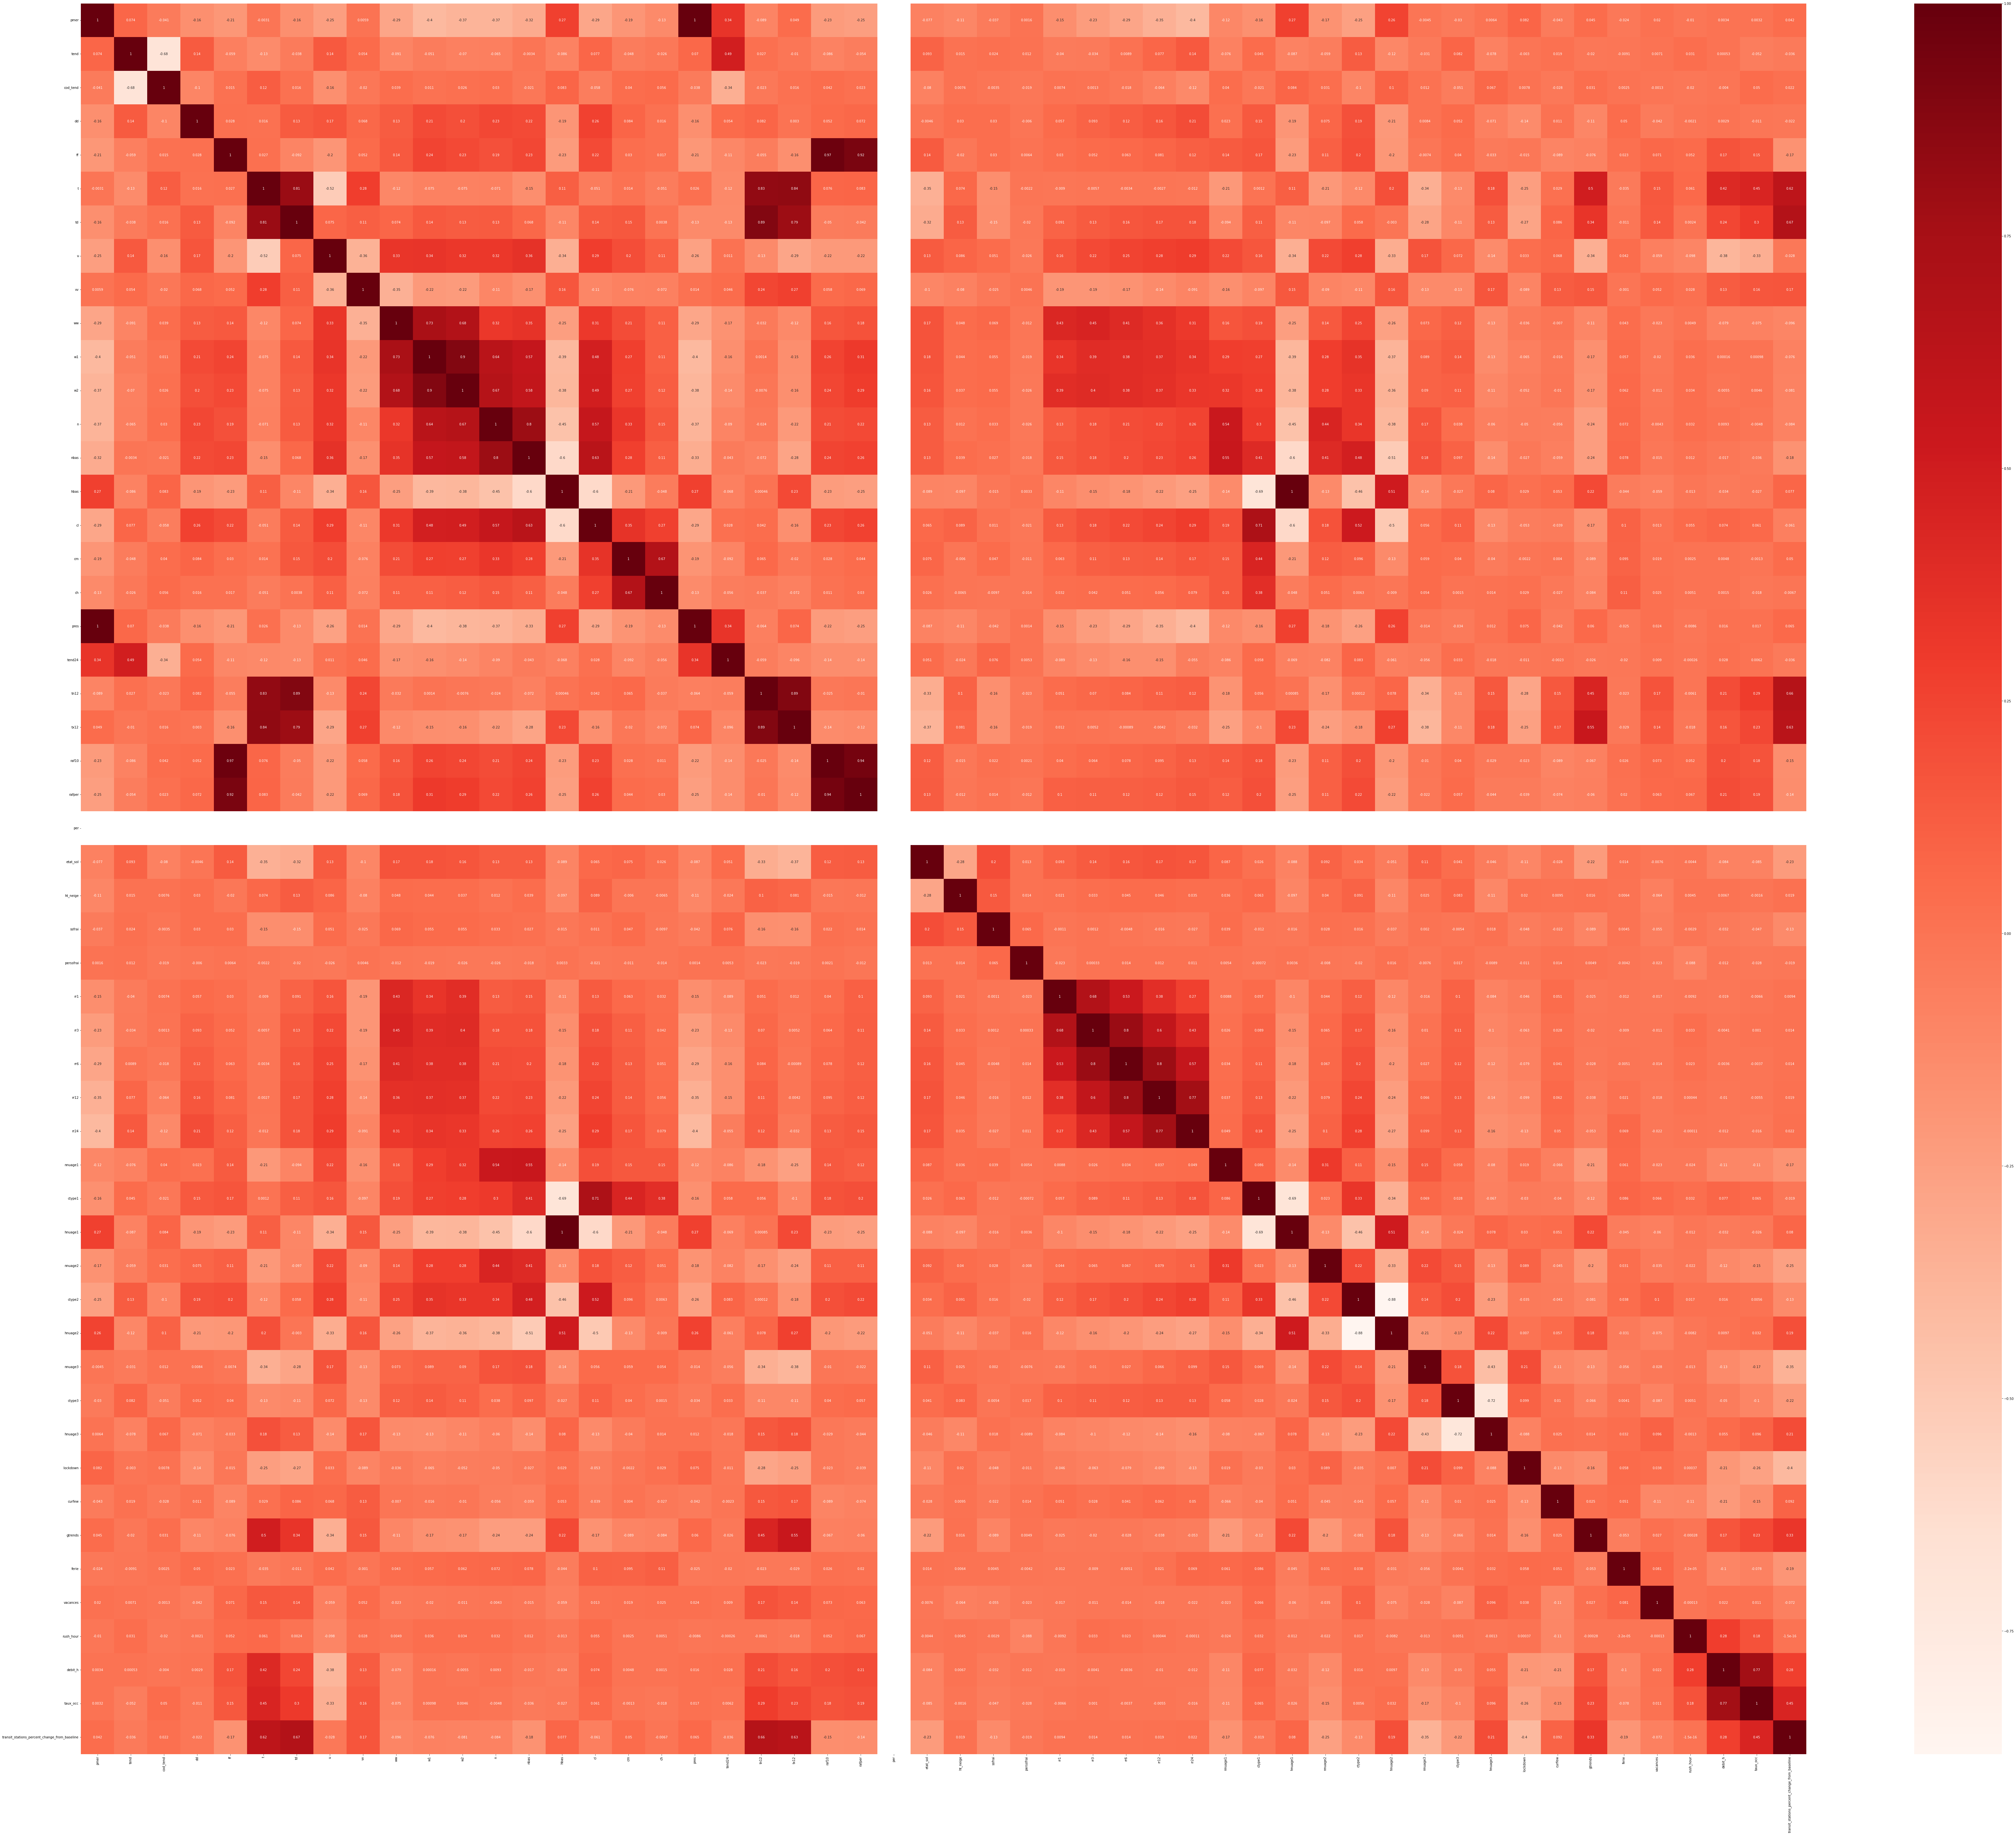

In [109]:
plt.figure(figsize=(120,100))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.savefig('fselect.png')
plt.show()

FREQUENCY METRO DISTRIBUTION

<AxesSubplot:xlabel='date'>

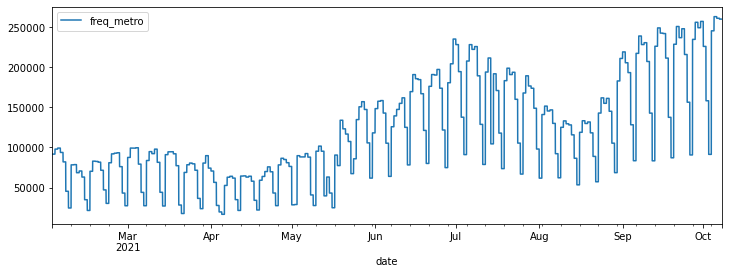

In [110]:
mask = ((df['date'] > pd.to_datetime('2021/02/01'))
        & (df['date'] < pd.to_datetime('2021/10/08')))

df_viz = df.loc[mask].copy()

fig, ax = plt.subplots(figsize=(12, 4))

df_viz.plot(x='date', y='freq_metro', ax=ax)

LOCKDOWN DISTRIBUTION

<AxesSubplot:xlabel='date'>

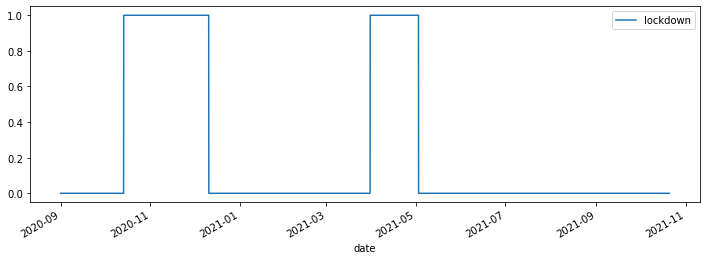

In [111]:
mask = ((df['date'] > pd.to_datetime('2020/09/01'))
        & (df['date'] < pd.to_datetime('2021/10/21')))

df_viz = df.loc[mask].copy()

fig, ax = plt.subplots(figsize=(12, 4))

df_viz.plot(x='date', y='lockdown', ax=ax)

CURFEW DISTRIBUTION

<AxesSubplot:xlabel='date'>

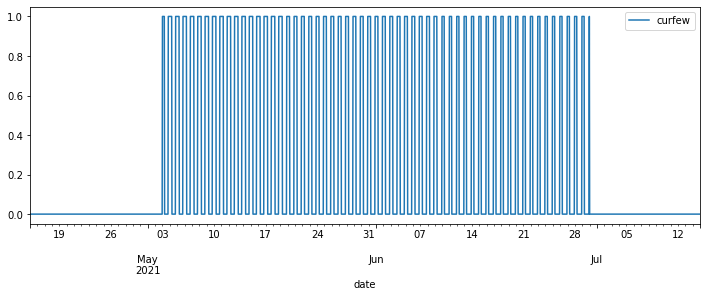

In [112]:
mask = ((df['date'] > pd.to_datetime('2021/04/15'))
        & (df['date'] < pd.to_datetime('2021/07/15')))

df_viz = df.loc[mask].copy()

fig, ax = plt.subplots(figsize=(12, 4))

df_viz.plot(x='date', y='curfew', ax=ax)

HOLIDAY DISTRIBUTION

<AxesSubplot:xlabel='date'>

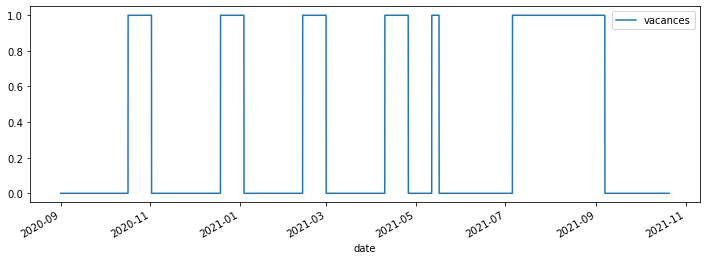

In [113]:
mask = ((df['date'] > pd.to_datetime('2020/09/01'))
        & (df['date'] < pd.to_datetime('2021/10/21')))

df_viz = df.loc[mask].copy()

fig, ax = plt.subplots(figsize=(12, 4))

df_viz.plot(x='date', y='vacances', ax=ax)

BANK HOLIDAY DISTRIBUTION

<AxesSubplot:xlabel='date'>

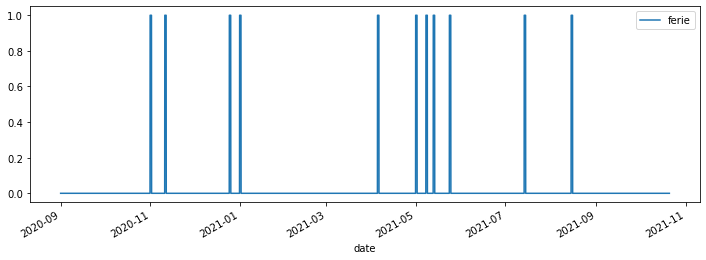

In [114]:
mask = ((df['date'] > pd.to_datetime('2020/09/01'))
        & (df['date'] < pd.to_datetime('2021/10/21')))

df_viz = df.loc[mask].copy()

fig, ax = plt.subplots(figsize=(12, 4))

df_viz.plot(x='date', y='ferie', ax=ax)

TRANSIT STATIONS PERCET CHANGE

<AxesSubplot:xlabel='date'>

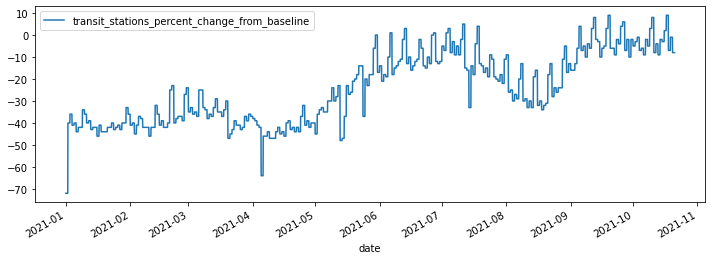

In [115]:
mask = ((df['date'] > pd.to_datetime('2020/09/01'))
        & (df['date'] < pd.to_datetime('2021/10/21')))

df_viz = df.loc[mask].copy()

fig, ax = plt.subplots(figsize=(12, 4))

df_viz.plot(x='date', y='transit_stations_percent_change_from_baseline', ax=ax)

GOOGLE TRENDS DISTRIBUTION

<AxesSubplot:xlabel='date'>

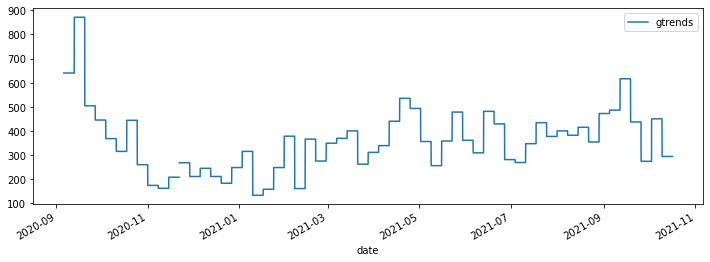

In [116]:
mask = ((df['date'] > pd.to_datetime('2020/09/01'))
        & (df['date'] < pd.to_datetime('2021/10/21')))

df_viz = df.loc[mask].copy()

fig, ax = plt.subplots(figsize=(12, 4))

df_viz.plot(x='date', y='gtrends', ax=ax)

TAUX OCC

<AxesSubplot:xlabel='date'>

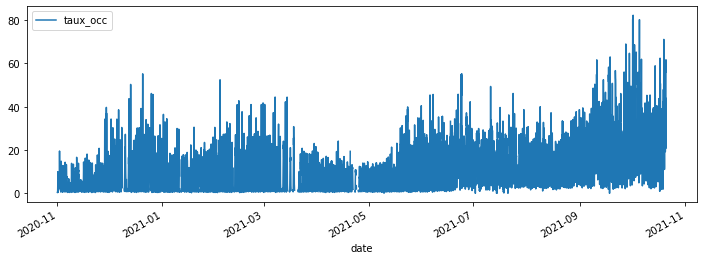

In [117]:
mask = ((df['date'] > pd.to_datetime('2020/09/01'))
        & (df['date'] < pd.to_datetime('2021/10/21')))

df_viz = df.loc[mask].copy()

fig, ax = plt.subplots(figsize=(12, 4))

df_viz.plot(x='date', y='taux_occ', ax=ax)

DEBIT H

<AxesSubplot:xlabel='date'>

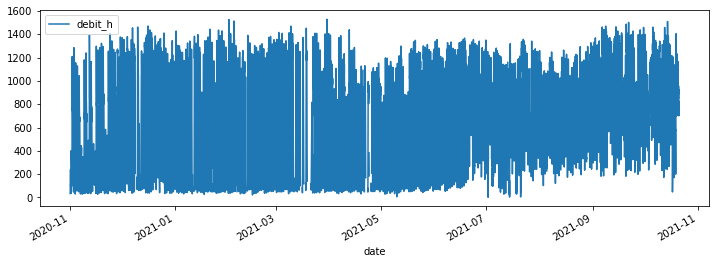

In [118]:
mask = ((df['date'] > pd.to_datetime('2020/09/01'))
        & (df['date'] < pd.to_datetime('2021/10/21')))

df_viz = df.loc[mask].copy()

fig, ax = plt.subplots(figsize=(12, 4))

df_viz.plot(x='date', y='debit_h', ax=ax)

# 2. Modelling

## 2.1. Ridge Regression (baseline model)

In [29]:
from sklearn.preprocessing import FunctionTransformer, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline

date_encoder = FunctionTransformer(_encode_dates)
date_cols = _encode_dates(X_train_merge[['date']]).columns.tolist()

categorical_encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
categorical_cols = ["counter_name", "site_name"]

numeric_cols = ['t','n','lockdown', 'freq_metro', 'curfew', 'ferie', 'vacances', 'rush_hour', 'debit_h', 'rr1', 'transit_stations_percent_change_from_baseline', 'gtrends']

preprocessor = ColumnTransformer([
    ('date', "passthrough", date_cols),
    ('cat', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), categorical_cols),
    ('numeric', 'passthrough', numeric_cols)
])

regressor = Ridge()

pipe =  make_pipeline(
    date_encoder,
    preprocessor,
    regressor
)

pipe.fit(X_train_merge, y_train)

Pipeline(steps=[('functiontransformer',
                 FunctionTransformer(func=<function _encode_dates at 0x171eb0940>)),
                ('columntransformer',
                 ColumnTransformer(transformers=[('date', 'passthrough',
                                                  ['year', 'month', 'month_sin',
                                                   'month_cos', 'day',
                                                   'weekday', 'weekday_sin',
                                                   'weekday_cos', 'hour',
                                                   'hour_sin', 'hour_cos']),
                                                 ('cat',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['counter_name',
                                                   'site_name']),
         

In [30]:
from sklearn.metrics import mean_squared_error
print(f'Train set, RMSE={mean_squared_error(y_train, pipe.predict(X_train_merge), squared=False):.2f}')
print(f'Test set, RMSE={mean_squared_error(y_test, pipe.predict(X_test_merge), squared=False):.2f}')

Train set, RMSE=1.13
Test set, RMSE=1.15


## 2.2. Random Forest

In [31]:
from sklearn.preprocessing import FunctionTransformer, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline

date_encoder = FunctionTransformer(_encode_dates)
date_cols = _encode_dates(X_train_merge[['date']]).columns.tolist()

categorical_encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
categorical_cols = ["counter_name", "site_name"]

numeric_cols = ['t','n','lockdown', 'freq_metro', 'curfew', 'ferie', 'vacances', 'rush_hour', 'debit_h', 'rr1', 'transit_stations_percent_change_from_baseline', 'gtrends']

preprocessor = ColumnTransformer([
    ('date', "passthrough", date_cols),
    ('cat', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), categorical_cols),
    ('numeric', 'passthrough', numeric_cols)
])

regressor = RandomForestRegressor()

pipe =  make_pipeline(
    #FunctionTransformer(_merge_external_data, validate=False),
    date_encoder,
    preprocessor,
    regressor
)

pipe.fit(X_train_merge, y_train)
#clf = GridSearchCV(pipe, parameters, scoring='neg_mean_squared_error', cv=cv)

Pipeline(steps=[('functiontransformer',
                 FunctionTransformer(func=<function _encode_dates at 0x171eb0940>)),
                ('columntransformer',
                 ColumnTransformer(transformers=[('date', 'passthrough',
                                                  ['year', 'month', 'month_sin',
                                                   'month_cos', 'day',
                                                   'weekday', 'weekday_sin',
                                                   'weekday_cos', 'hour',
                                                   'hour_sin', 'hour_cos']),
                                                 ('cat',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['counter_name',
                                                   'site_name']),
         

In [32]:
from sklearn.metrics import mean_squared_error
print(f'Train set, RMSE={mean_squared_error(y_train, pipe.predict(X_train_merge), squared=False):.2f}')
print(f'Test set, RMSE={mean_squared_error(y_test, pipe.predict(X_test_merge), squared=False):.2f}')

Train set, RMSE=0.14
Test set, RMSE=0.46


## 2.3. XGBoost

In [33]:
from sklearn.preprocessing import FunctionTransformer, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import make_pipeline

date_encoder = FunctionTransformer(_encode_dates)
date_cols = _encode_dates(X_train_merge[['date']]).columns.tolist()

categorical_encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
categorical_cols = ["counter_name", "site_name"]

numeric_cols = ['t','n','lockdown', 'freq_metro', 'curfew', 'ferie', 'vacances', 'rush_hour', 'debit_h', 'rr1', 'transit_stations_percent_change_from_baseline', 'gtrends']

preprocessor = ColumnTransformer([
    ('date', "passthrough", date_cols),
    ('cat', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), categorical_cols),
    ('numeric', 'passthrough', numeric_cols)
])

regressor = GradientBoostingRegressor()

pipe =  make_pipeline(
    #FunctionTransformer(_merge_external_data, validate=False),
    date_encoder,
    preprocessor,
    regressor
)

pipe.fit(X_train_merge, y_train)
#clf = GridSearchCV(pipe, parameters, scoring='neg_mean_squared_error', cv=cv)

Pipeline(steps=[('functiontransformer',
                 FunctionTransformer(func=<function _encode_dates at 0x171eb0940>)),
                ('columntransformer',
                 ColumnTransformer(transformers=[('date', 'passthrough',
                                                  ['year', 'month', 'month_sin',
                                                   'month_cos', 'day',
                                                   'weekday', 'weekday_sin',
                                                   'weekday_cos', 'hour',
                                                   'hour_sin', 'hour_cos']),
                                                 ('cat',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['counter_name',
                                                   'site_name']),
         

In [34]:
from sklearn.metrics import mean_squared_error
print(f'Train set, RMSE={mean_squared_error(y_train, pipe.predict(X_train_merge), squared=False):.2f}')
print(f'Test set, RMSE={mean_squared_error(y_test, pipe.predict(X_test_merge), squared=False):.2f}')

Train set, RMSE=0.73
Test set, RMSE=0.68


## 2.4 Hist-grad boosting

In [35]:
from sklearn.preprocessing import FunctionTransformer, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.pipeline import make_pipeline

date_encoder = FunctionTransformer(_encode_dates)
date_cols = _encode_dates(X_train_merge[['date']]).columns.tolist()

categorical_encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
categorical_cols = ["counter_name", "site_name"]

numeric_cols = ['t','n','lockdown', 'freq_metro', 'curfew', 'ferie', 'vacances', 'rush_hour', 'debit_h', 'rr1', 'transit_stations_percent_change_from_baseline', 'gtrends']

preprocessor = ColumnTransformer([
    ('date', "passthrough", date_cols),
    ('cat', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), categorical_cols),
    ('numeric', 'passthrough', numeric_cols)
])

# randomized search + grid search

random_grid = {'bootstrap': [True, False],
               'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
               'max_features': ['auto', 'sqrt'],
               'min_samples_leaf': [1, 2, 4],
               'min_samples_split': [2, 5, 10],
               'n_estimators': [130, 180, 230]}

regressor = HistGradientBoostingRegressor()

pipe =  make_pipeline(
    #FunctionTransformer(_merge_external_data, validate=False),
    date_encoder,
    preprocessor,
    regressor
)

pipe.fit(X_train_merge, y_train)
#clf = GridSearchCV(pipe, parameters, scoring='neg_mean_squared_error', cv=cv)

Pipeline(steps=[('functiontransformer',
                 FunctionTransformer(func=<function _encode_dates at 0x171eb0940>)),
                ('columntransformer',
                 ColumnTransformer(transformers=[('date', 'passthrough',
                                                  ['year', 'month', 'month_sin',
                                                   'month_cos', 'day',
                                                   'weekday', 'weekday_sin',
                                                   'weekday_cos', 'hour',
                                                   'hour_sin', 'hour_cos']),
                                                 ('cat',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['counter_name',
                                                   'site_name']),
         

In [36]:
from sklearn.metrics import mean_squared_error
print(f'Train set, RMSE={mean_squared_error(y_train, pipe.predict(X_train_merge), squared=False):.2f}')
print(f'Test set, RMSE={mean_squared_error(y_test, pipe.predict(X_test_merge), squared=False):.2f}')

Train set, RMSE=0.50
Test set, RMSE=0.52


## Grid Search LightGBM

In [25]:
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform
param_test ={'lgbmregressor__num_leaves': sp_randint(6, 50), 
             'lgbmregressor__min_child_samples': sp_randint(100, 500), 
             'lgbmregressor__min_child_weight': [1e-5, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4],
             'lgbmregressor__subsample': sp_uniform(loc=0.2, scale=0.8), 
             'lgbmregressor__colsample_bytree': sp_uniform(loc=0.4, scale=0.6),
             'lgbmregressor__reg_alpha': [0, 1e-1, 1, 2, 5, 7, 10, 50, 100],
             'lgbmregressor__reg_lambda': [0, 1e-1, 1, 5, 10, 20, 50, 100]}

In [26]:
from pathlib import Path
import numpy as np
import pandas as pd
from sklearn.preprocessing import FunctionTransformer, OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import Ridge
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import lightgbm as lgb
    
date_encoder = FunctionTransformer(_encode_dates)
date_cols = _encode_dates(X_train_merge[['date']]).columns.tolist() #date_cols = ['year', 'month_sin', 'day', 'weekday_sin', 'hour_sin', 'month_cos', 'weekday_cos', 'hour_cos']

categorical_encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
categorical_cols = ["counter_name", "site_name"]

numeric_cols = ['t','n','lockdown', 'freq_metro', 'curfew', 'ferie', 'vacances', 'rush_hour', 'debit_h', 'rr1', 'transit_stations_percent_change_from_baseline', 'gtrends']

preprocessor = ColumnTransformer([
    ('date', "passthrough", date_cols),
    ('cat', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), categorical_cols),
    ('numeric', 'passthrough', numeric_cols)
])


#n_estimators is set to a "large value". The actual number of trees build will depend on early stopping and 5000 define only the absolute maximum
reg = lgb.LGBMRegressor(max_depth=-1, random_state=314, metric='neg_mean_square_error', n_jobs=4, n_estimators=5000)

pipe =  make_pipeline(
    #FunctionTransformer(_merge_external_data, validate=False),
    date_encoder,
    preprocessor,
    reg
)

gs = RandomizedSearchCV(
    estimator=pipe, param_distributions=param_test, n_iter=100,
    refit=True,
    random_state=314,
    verbose=True)


gs.fit(X_train_merge, y_train)
print('Best score reached: {} with params: {} '.format(gs.best_score_, gs.best_params_))

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best score reached: 0.832070810702273 with params: {'lgbmregressor__colsample_bytree': 0.404828563763895, 'lgbmregressor__min_child_samples': 350, 'lgbmregressor__min_child_weight': 0.001, 'lgbmregressor__num_leaves': 36, 'lgbmregressor__reg_alpha': 1, 'lgbmregressor__reg_lambda': 5, 'lgbmregressor__subsample': 0.9274016358891894} 


In [ ]:
from sklearn.ensemble import HistGradientBoostingRegressor
import lightgbm as lgb
from sklearn.preprocessing import OrdinalEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

date_encoder = FunctionTransformer(_encode_dates)
date_cols = _encode_dates(X_train[['date']]).columns.tolist()

categorical_encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
categorical_cols = ["counter_name", "site_name"]

numeric_cols = ['t','n','lockdown', 'freq_metro', 'curfew', 'ferie', 'vacances', 'rush_hour', 'debit_h', 'rr1', 'transit_stations_percent_change_from_baseline', 'gtrends']

preprocessor = ColumnTransformer([
    ('date', "passthrough", date_cols),
    ('cat', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), categorical_cols),
    ('numeric', 'passthrough', numeric_cols)
])

#regressor = HistGradientBoostingRegressor(random_state=1)
regressor = lgb.LGBMRegressor(random_state=42)

#Define the parameters
parameters = {'num_leaves':[20,40,60,80,100], 'min_child_samples':[5,10,15],'max_depth':[-1,5,10,20],
             'learning_rate':[0.05,0.1,0.2],'reg_alpha':[0,0.01,0.03]}


pipe =  make_pipeline(
    FunctionTransformer(_merge_external_data, validate=False),
    date_encoder,
    preprocessor,
    regressor
)

clf = GridSearchCV(pipe, param_grid = parameters, scoring='neg_mean_squared_error')

## Add lag for time series analysis

In [63]:
shift_day = 24 # by 1 day
X_train_merge['y_train_lagged'] = y_train
X_train_merge['y_train'] = y_train
X_train_merge = X_train_merge.sort_values(by=['date'])
X_train_merge['counter_name'].unique()
list1=[]
for i in X_train_merge['counter_name'].unique():
    df = X_train_merge[(X_train_merge['counter_name']) == i]
    df['y_train_lagged'] = df.y_train.shift(shift_day)
    list1.append(df)
    
X_train_ben = pd.concat(list1)

/var/folders/n6/nn0qbxhx0cv_t7njxp24fwsr0000gn/T/ipykernel_58978/3420462466.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['y_train_lagged'] = df.y_train.shift(shift_day)


In [66]:
X_train_ben.head()

,counter_id,counter_name,site_id,site_name,date,counter_installation_date,coordinates,counter_technical_id,latitude,longitude,...,curfew,ferie,vacances,rush_hour,debit_h,rr1,transit_stations_percent_change_from_baseline,gtrends,y_train_lagged,y_train
0,100049407-353255860,152 boulevard du Montparnasse E-O,100049407,152 boulevard du Montparnasse,2020-09-01 01:00:00,2018-12-07,"48.840801,2.333233",Y2H19070373,48.840801,2.333233,...,0,0,0,0,61.0,0.0,-42.0,457.0,NaN,1.609438
84,100049407-353255860,152 boulevard du Montparnasse E-O,100049407,152 boulevard du Montparnasse,2020-09-01 02:00:00,2018-12-07,"48.840801,2.333233",Y2H19070373,48.840801,2.333233,...,0,0,0,0,61.0,0.0,-42.0,457.0,NaN,0.000000
149,100049407-353255860,152 boulevard du Montparnasse E-O,100049407,152 boulevard du Montparnasse,2020-09-01 03:00:00,2018-12-07,"48.840801,2.333233",Y2H19070373,48.840801,2.333233,...,0,0,0,0,61.0,0.0,-42.0,457.0,NaN,1.098612
191,100049407-353255860,152 boulevard du Montparnasse E-O,100049407,152 boulevard du Montparnasse,2020-09-01 04:00:00,2018-12-07,"48.840801,2.333233",Y2H19070373,48.840801,2.333233,...,0,0,0,0,61.0,0.0,-42.0,457.0,NaN,2.833213
245,100049407-353255860,152 boulevard du Montparnasse E-O,100049407,152 boulevard du Montparnasse,2020-09-01 05:00:00,2018-12-07,"48.840801,2.333233",Y2H19070373,48.840801,2.333233,...,0,0,0,0,61.0,0.0,-42.0,457.0,NaN,4.060443


In [67]:
X_train_new = X_train_ben.iloc[:,:-1]
y_train_new = X_train_ben.iloc[:,-1]

## 2.5. LightGBM

In [68]:
from sklearn.preprocessing import FunctionTransformer, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
import lightgbm as lgb

date_encoder = FunctionTransformer(_encode_dates)
date_cols = _encode_dates(X_train_new[['date']]).columns.tolist()

categorical_encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
categorical_cols = ["counter_name", "site_name"]

numeric_cols = ['t','n','lockdown', 'freq_metro', 'curfew', 'ferie', 'vacances', 'rush_hour', 'debit_h', 'rr1', 'transit_stations_percent_change_from_baseline', 'gtrends']

preprocessor = ColumnTransformer([
    ('date', "passthrough", date_cols),
    ('cat', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), categorical_cols),
    ('numeric', 'passthrough', numeric_cols)
])

regressor = lgb.LGBMRegressor()

pipe =  make_pipeline(
    #FunctionTransformer(_merge_external_data, validate=False),
    date_encoder,
    preprocessor,
    regressor
)

pipe.fit(X_train_new, y_train_new)
#clf = GridSearchCV(pipe, parameters, scoring='neg_mean_squared_error', cv=cv)

Pipeline(steps=[('functiontransformer',
                 FunctionTransformer(func=<function _encode_dates at 0x171356310>)),
                ('columntransformer',
                 ColumnTransformer(transformers=[('date', 'passthrough',
                                                  ['year', 'month', 'month_sin',
                                                   'month_cos', 'day',
                                                   'weekday', 'weekday_sin',
                                                   'weekday_cos', 'hour',
                                                   'hour_sin', 'hour_cos']),
                                                 ('cat',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['counter_name',
                                                   'site_name']),
         

In [69]:
from sklearn.metrics import mean_squared_error
print(f'Train set, RMSE={mean_squared_error(y_train_new, pipe.predict(X_train_new), squared=False):.2f}')
print(f'Test set, RMSE={mean_squared_error(y_test, pipe.predict(X_test_merge), squared=False):.2f}')

Train set, RMSE=0.50
Test set, RMSE=0.52


## 2.6. CatBoost

In [74]:
from sklearn.preprocessing import FunctionTransformer, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
import catboost as cb

date_encoder = FunctionTransformer(_encode_dates)
date_cols = _encode_dates(X_train_merge[['date']]).columns.tolist()

categorical_encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
categorical_cols = ["counter_name", "site_name"]

numeric_cols = ['t','n','lockdown', 'freq_metro', 'curfew', 'ferie', 'vacances', 'rush_hour', 'debit_h', 'rr1', 'transit_stations_percent_change_from_baseline', 'gtrends']

preprocessor = ColumnTransformer([
    ('date', "passthrough", date_cols),
    ('cat', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), categorical_cols),
    ('numeric', 'passthrough', numeric_cols)
])

regressor = cb.CatBoostRegressor()

pipe =  make_pipeline(
    #FunctionTransformer(_merge_external_data, validate=False),
    date_encoder,
    preprocessor,
    regressor
)

pipe.fit(X_train_merge, y_train)
#clf = GridSearchCV(pipe, parameters, scoring='neg_mean_squared_error', cv=cv)

Learning rate set to 0.107689
0:	learn: 1.5701114	total: 44.1ms	remaining: 44s
1:	learn: 1.4805370	total: 66.3ms	remaining: 33.1s
2:	learn: 1.4040493	total: 88.5ms	remaining: 29.4s
3:	learn: 1.3388498	total: 111ms	remaining: 27.7s
4:	learn: 1.2828399	total: 136ms	remaining: 27s
5:	learn: 1.2331725	total: 159ms	remaining: 26.3s
6:	learn: 1.1935705	total: 185ms	remaining: 26.2s
7:	learn: 1.1583760	total: 211ms	remaining: 26.2s
8:	learn: 1.1303093	total: 240ms	remaining: 26.4s
9:	learn: 1.1057019	total: 273ms	remaining: 27s
10:	learn: 1.0842306	total: 299ms	remaining: 26.9s
11:	learn: 1.0629790	total: 324ms	remaining: 26.6s
12:	learn: 1.0462882	total: 345ms	remaining: 26.2s
13:	learn: 1.0330259	total: 370ms	remaining: 26s
14:	learn: 1.0222503	total: 394ms	remaining: 25.9s
15:	learn: 1.0092951	total: 419ms	remaining: 25.8s
16:	learn: 1.0001798	total: 446ms	remaining: 25.8s
17:	learn: 0.9898589	total: 477ms	remaining: 26s
18:	learn: 0.9836793	total: 500ms	remaining: 25.8s
19:	learn: 0.97740

Pipeline(steps=[('functiontransformer',
                 FunctionTransformer(func=<function _encode_dates at 0x171356310>)),
                ('columntransformer',
                 ColumnTransformer(transformers=[('date', 'passthrough',
                                                  ['year', 'month', 'month_sin',
                                                   'month_cos', 'day',
                                                   'weekday', 'weekday_sin',
                                                   'weekday_cos', 'hour',
                                                   'hour_sin', 'hour_cos']),
                                                 ('cat',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['counter_name',
                                                   'site_name']),
         

In [76]:
from sklearn.metrics import mean_squared_error
print(f'Train set, RMSE={mean_squared_error(y_train, pipe.predict(X_train_merge), squared=False):.2f}')
print(f'Test set, RMSE={mean_squared_error(y_test, pipe.predict(X_test_merge), squared=False):.2f}')

Train set, RMSE=0.76
Test set, RMSE=1.02


In [70]:
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform
params = {'depth':[3,1,2,6,4,5,7,8,9,10],
          'iterations':[250,100,500,1000],
          'learning_rate':[0.03,0.001,0.01,0.1,0.2,0.3], 
          'l2_leaf_reg':[3,1,5,10,100],
          'border_count':[32,5,10,20,50,100,200],
          'ctr_border_count':[50,5,10,20,100,200],
          'thread_count':4}

In [73]:
from pathlib import Path
import numpy as np
import pandas as pd
from sklearn.preprocessing import FunctionTransformer, OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import Ridge
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from catboost import CatBoostRegressor
    
date_encoder = FunctionTransformer(_encode_dates)
date_cols = _encode_dates(X_train_merge[['date']]).columns.tolist() #date_cols = ['year', 'month_sin', 'day', 'weekday_sin', 'hour_sin', 'month_cos', 'weekday_cos', 'hour_cos']

categorical_encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
categorical_cols = ["counter_name", "site_name"]

numeric_cols = ['t','n','lockdown', 'freq_metro', 'curfew', 'ferie', 'vacances', 'rush_hour', 'debit_h', 'rr1', 'transit_stations_percent_change_from_baseline', 'gtrends']

preprocessor = ColumnTransformer([
    ('date', "passthrough", date_cols),
    ('cat', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), categorical_cols),
    ('numeric', 'passthrough', numeric_cols)
])


#n_estimators is set to a "large value". The actual number of trees build will depend on early stopping and 5000 define only the absolute maximum
reg = CatBoostRegressor(max_depth=-1, random_seed=314, loss_function='RMSE', n_estimators=5000)

pipe =  make_pipeline(
    #FunctionTransformer(_merge_external_data, validate=False),
    date_encoder,
    preprocessor,
    reg
)

gs = RandomizedSearchCV(
    estimator=pipe, param_distributions=params, n_iter=50,
    refit=True,
    random_state=314,
    verbose=True)


gs.fit(X_train_merge, y_train)
print('Best score reached: {} with params: {} '.format(gs.best_score_, gs.best_params_))

TypeError: Parameter value is not iterable or distribution (key='thread_count', value=4)

## 2.7. Feature Importance + Hyperparameter tuning of best model

In [60]:
cols = X_test_merge.columns.to_list()
cols.insert(0, 0)
cols.insert(1, 0)
cols.insert(2, 0)

merger = pipe[:2]
X_train_augmented = merger.transform(X_train_merge)
X_test_augmented = merger.transform(X_test_merge)

predictor = pipe[2:]
_ = predictor.fit(X_train_augmented, y_train)

Learning rate set to 0.107689
0:	learn: 1.5655821	total: 24.3ms	remaining: 24.3s
1:	learn: 1.4718498	total: 47.1ms	remaining: 23.5s
2:	learn: 1.3923004	total: 70.4ms	remaining: 23.4s
3:	learn: 1.3248580	total: 94.4ms	remaining: 23.5s
4:	learn: 1.2645134	total: 116ms	remaining: 23.2s
5:	learn: 1.2130939	total: 143ms	remaining: 23.7s
6:	learn: 1.1700509	total: 170ms	remaining: 24.1s
7:	learn: 1.1329827	total: 195ms	remaining: 24.2s
8:	learn: 1.1022269	total: 234ms	remaining: 25.7s
9:	learn: 1.0716327	total: 269ms	remaining: 26.6s
10:	learn: 1.0487976	total: 303ms	remaining: 27.2s
11:	learn: 1.0286001	total: 328ms	remaining: 27s
12:	learn: 1.0045624	total: 355ms	remaining: 26.9s
13:	learn: 0.9866557	total: 380ms	remaining: 26.8s
14:	learn: 0.9683563	total: 406ms	remaining: 26.6s
15:	learn: 0.9543792	total: 431ms	remaining: 26.5s
16:	learn: 0.9415009	total: 453ms	remaining: 26.2s
17:	learn: 0.9297296	total: 478ms	remaining: 26.1s
18:	learn: 0.9196843	total: 508ms	remaining: 26.2s
19:	learn

In [61]:
# Feature Importance
from sklearn.inspection import permutation_importance

feature_importances = permutation_importance(
    predictor, X_train_augmented[:20000], y_train[:20000], n_repeats=10, random_state=0
)

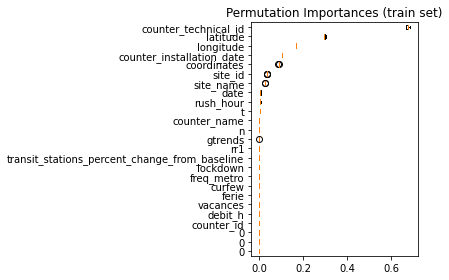

In [62]:
sorted_idx = feature_importances.importances_mean.argsort()

X_train_augmented = pd.DataFrame(X_train_augmented, columns=cols)

fig, ax = plt.subplots()
ax.boxplot(feature_importances.importances[sorted_idx].T,
           vert=False, labels=X_train_augmented.columns[sorted_idx])
ax.set_title("Permutation Importances (train set)")
fig.tight_layout()
plt.show()